In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random,math

In [49]:

import matplotlib.font_manager as fm

random.seed(4)

In [50]:
def calculate_payoff(i, N, a, b, c, d):
    payoff_A = (a * (i - 1) / (N - 1)) + (b * (N - i) / (N - 1))
    payoff_B = (c * i / (N - 1)) + (d * (N - i - 1) / (N - 1))
    # print(payoff_A,' ',payoff_B)
    return payoff_A, payoff_B

In [51]:

def calculate_fitness(payoff_A, payoff_B, omega):
    fitness_A = 1 - omega + omega * payoff_A
    fitness_B = 1 - omega + omega * payoff_B
    return fitness_A, fitness_B

    

In [52]:
def migration_strength():
    sigma=(nkt/nt)+(math.exp(((nt-nt-1)/(nt_1)))) * ((p/c)+((hbt)/(hbt+lbt))) * ((hngn/htot)+(mbudget/mcost))
    # print((hngn/htot)+(mbudget/mcost))
    sigmoid=1.0/(1+math.exp(-sigma))
    return 1+sigmoid




In [53]:
results = []
def moran_process(N, a, b, c, d, omega,j,nkt_rate_list,nt_rate_list,hbt_rate_list,lbt_rate_list,mbudget_rate_list,mcost_rate_list,generations=20):
    population = ['A'] * 2 + ['B'] * (N-2)  
    
    i_result=[]
    for generation in range(generations):
        i = population.count('A')
        payoff_A, payoff_B = calculate_payoff(i, N, a, b, c, d)
        fitness_A, fitness_B = calculate_fitness(payoff_A, payoff_B, omega)
        migration_multiplier=migration_strength()
        # print(migration_multiplier,' ',j)
        fitness_A=fitness_A*(migration_multiplier)
        
        global nkt,nt_1,nt,hbt,lbt,mbudget,mcost,hngn
        nkt+=nkt_rate_list[j]*nkt
        nt_1=nt
        nt+=nt_rate_list[j]*nt
        
        hngn+=0.01*hngn

        hbt+=hbt_rate_list[j]*hbt
        lbt+=lbt_rate_list[j]*lbt
        
        mbudget+=mbudget_rate_list[j]*mbudget
        mcost+=mcost_rate_list[j]*mcost
        
        # print(lbt)
        
        prob_A_birth = ((i * fitness_A)/(i*fitness_A+(N-i)*fitness_B))*((N-i)/(N))
        # prob_B_birth = (((N-i)*fitness_B)/(i*fitness_A+(N-1)*fitness_B))*(i/N)
        # print(fitness_A,' ',fitness_B,' ',j)
        prob_B_birth=0
        prob_const=1-prob_A_birth-prob_B_birth  
        event=random.choices(['A_birth','B_birth','constant'],weights=[prob_A_birth,prob_B_birth,prob_const])[0]
        # print(prob_A_birth,' ',prob_B_birth,' ',prob_const,' ',j)
        i_result.append(prob_A_birth)
        # print(prob_A_birth+prob_B_birth+prob_const)
        if event=='constant':
            pass
        elif event=='A_birth':
            # print('a birth')
            idx = population.index('B')
            population[idx] = 'A'
        else:
            idx = population.index('A')
            population[idx] = 'B'
        
        if population.count('A') == 0:
            return 0, generation  
        elif population.count('A') == N:
            return 1, generation  
    # print(population.count('A')/N)
    results.append(i_result)
    return population.count('A') / N, generations

nkt_rate_list=[0,0.02,0.03,0.01]
nt_rate_list=[-0.02,-0.03,-0.05,0.02]

hbt_rate_list=[0.07,0.05,0.03,0.05]
lbt_rate_list=[0.06,0.03,-0.01,-0.02]

mbudget_rate_list=[0.05,0.035,0.02,0.03]
mcost_rate_list=[0.02,0.03,0.05,0.05]

for i in range(4):

    a = 600
    b = 800
    c = 100
    d = 500

    N = 14
    omega = 0.4  #RAN factor 

    nkt=300
    nt=1000
    nt_1=1000

    p=125
    c=100

    hbt=600
    lbt=400

    hngn=12
    htot=100

    mbudget=30000
    mcost=45000
    moran_process(N,a,b,c,d,omega,i,nkt_rate_list,nt_rate_list,hbt_rate_list,lbt_rate_list,mbudget_rate_list,mcost_rate_list)
print(results)

[[0.3047360449998516, 0.38371889106041673, 0.42721104084379546, 0.442632510190631, 0.43588241359776586, 0.41168727832058194, 0.37386038668803573, 0.37399689761212246, 0.3741306246358085, 0.37426139893203647, 0.32573490084201845, 0.3258101759553345, 0.2692916525788402, 0.20689525961022906, 0.14031785111550452, 0.14032368899266434, 0.14032931812751515, 0.14033473431784102, 0.14033993410900303, 0.1403449148196019], [0.3047360449998516, 0.30509642541843673, 0.305460017667432, 0.30582729671092646, 0.30619813472448976, 0.3065723810867514, 0.38532098318847, 0.3857000994957198, 0.3860818126196355, 0.3864658611026348, 0.4294216870805576, 0.4297598098333797, 0.4445321730322296, 0.44480450424630363, 0.44507700302981196, 0.4453493477340745, 0.43781375068392286, 0.4380166186477445, 0.43821848434328065, 0.43841903838821056], [0.3047360449998516, 0.30473003692632683, 0.3047599290762016, 0.3048286989496199, 0.30493827906352483, 0.38346563799883804, 0.4266348633903031, 0.42684652855043415, 0.4421241329

In [54]:
print(len(results))

4


In [55]:
# timestep=np.arange(20)
# plt.figure(figsize=(10,10))
# plt.plot(timestep+1, results[0], '-dr', 
#          label='$\sigma$ at $\sigma_c$(0.5%$\u2191$,2%$\u2191$), $\sigma_h$(2%$\u2191$,5%$\u2191$) & $\sigma_t$(2%$\u2191$,0.2%$\u2191$)')
# plt.plot(timestep+1, results[1], '->g',
#          label='$\sigma$ at $\sigma_c$(3%$\u2191$,-3%$\u2193$),$\sigma_h$(5%$\u2191$,-2%$\u2193$) & $\sigma_t$(5%$\u2191$,0.2%$\u2191$)')
# plt.plot(timestep+1, results[2], '-xk',
#          label='$\sigma$ at $\sigma_c$(1%$\u2191$,-2%$\u2193$), $\sigma_h$(6%$\u2191$,1.4%$\u2191$) & $\sigma_t$(3%$\u2191$,2%$\u2191$)')
# plt.plot(timestep+1, results[3], '-pb',
#          label='$\sigma$ at $\sigma_c$(5%$\u2191$,-5%$\u2193$),$\sigma_h$(10%$\u2191$,-2%$\u2193$) & $\sigma_t$(7%$\u2191$,3%$\u2191$)')
# plt.xlabel('Number of Time Steps\n(b)')
# plt.ylabel('$P_{i,i+1}$')
# plt.xticks([1, 5, 10, 15, 20])

# font_props = fm.FontProperties(size=12)  
# plt.legend(prop=font_props)
# plt.grid(True)
# plt.show()

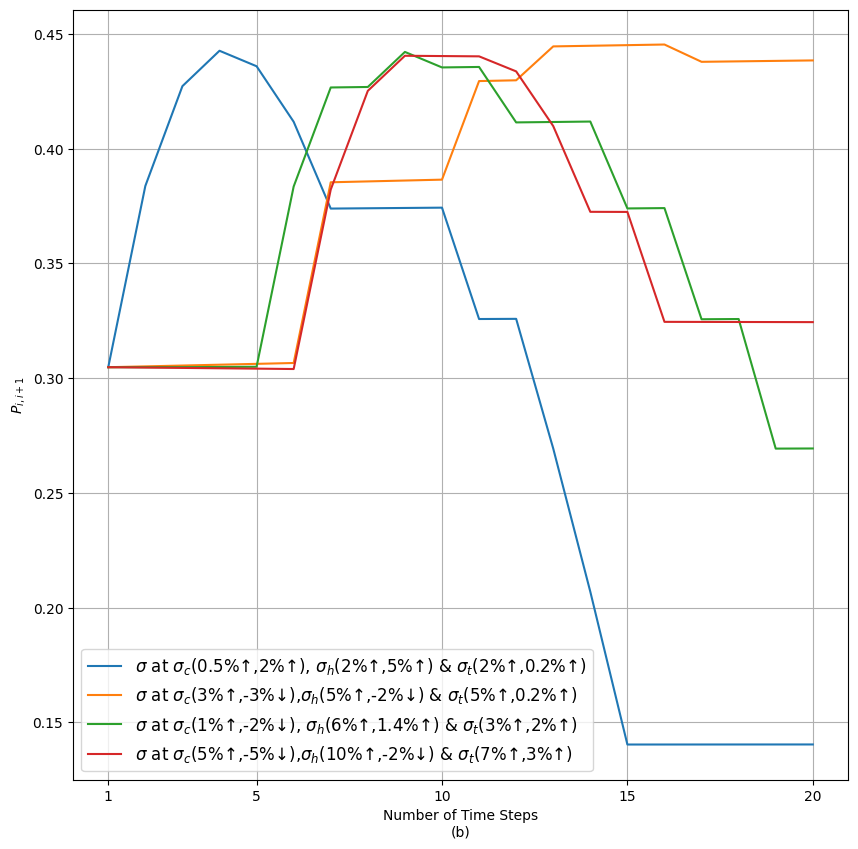

In [56]:
timestep=np.arange(20)
plt.figure(figsize=(10,10))
plt.plot(timestep+1, results[0], 
         label='$\sigma$ at $\sigma_c$(0.5%$\u2191$,2%$\u2191$), $\sigma_h$(2%$\u2191$,5%$\u2191$) & $\sigma_t$(2%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep+1, results[1],
         label='$\sigma$ at $\sigma_c$(3%$\u2191$,-3%$\u2193$),$\sigma_h$(5%$\u2191$,-2%$\u2193$) & $\sigma_t$(5%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep+1, results[2],
         label='$\sigma$ at $\sigma_c$(1%$\u2191$,-2%$\u2193$), $\sigma_h$(6%$\u2191$,1.4%$\u2191$) & $\sigma_t$(3%$\u2191$,2%$\u2191$)')
plt.plot(timestep+1, results[3],
         label='$\sigma$ at $\sigma_c$(5%$\u2191$,-5%$\u2193$),$\sigma_h$(10%$\u2191$,-2%$\u2193$) & $\sigma_t$(7%$\u2191$,3%$\u2191$)')
plt.xlabel('Number of Time Steps\n(b)')
plt.ylabel('$P_{i,i+1}$')
plt.xticks([1, 5, 10, 15, 20])

font_props = fm.FontProperties(size=12)  
plt.legend(prop=font_props)
plt.grid(True)
plt.show()